# Package loading

In [1]:
import numpy as np
import pandas as pd
import os
import shapely
from shapely.geometry.point import Point
from shapely.geometry import Polygon, LineString, Point
import dxfgrabber as dxfgb
import matplotlib.pyplot as plt
import math
import importlib

In [2]:
import dxfreader

# Sub features

In [3]:
def plot_dxf(dxfdetails):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    for closedsection in dxfdetails['closed_patterns']:
        poly = Polygon(closedsection)
        x, y = poly.exterior.xy
        plt.plot(x, y, color='g', alpha=0.5)
    
    for opensection in dxfdetails['open_patterns']:
        lines = LineString(opensection)
        x, y = lines.xy
        plt.plot(x, y, color='y', alpha=1)
    
    for bendlines, tangents in zip(dxfdetails['bend_line'], dxfdetails['tangents_coords']):
        lines = LineString(bendlines)
        color = (np.random.rand(),np.random.rand(),np.random.rand())
        x, y = lines.xy
        plt.plot(x, y, color=color)
        for tangent in tangents:
            lines = LineString(tangent)
            x, y = lines.xy
            plt.plot(x, y, color=color)
    
    centeraxis = dxfdetails['bend_center']
    for center, angle, direction, radius in zip(centeraxis,
                                               dxfdetails['bend_angle'],
                                               dxfdetails['bend_direction'],
                                               dxfdetails['bend_radius']):
        ax.text(center[0], center[1], '{} - {} - {}'.format(angle, direction, radius), color='c')
        
    
    poly = Polygon(dxfdetails['minimum_rectangle_coords'])
    x, y = poly.exterior.xy
    plt.plot(x, y, color='r')
    
    poly = Polygon(dxfdetails['convex_hull_coords'])
    x, y = poly.exterior.xy
    plt.plot(x, y, color='b')
    
    ax.set_aspect('equal')
    #ax.set_xlim([280,290])
    #ax.set_ylim([-90,-80])
    plt.show()
    fig.savefig('imgdata.png', format='png', dpi=90, bbox_inches='tight')
    
#plot_dxf(details)

# Package documentation

http://dxfgrabber.readthedocs.io/en/latest/  
https://shapely.readthedocs.io/en/latest/

# DXF loading

In [4]:
#List of all the dixs in the folder
dxffolder = '../Y2 - Sample DXF'
dxflist = [os.path.join(dxffolder, file) for file in os.listdir(dxffolder) if file.endswith('.dxf')]
for index, path in enumerate(dxflist):
    #print('{:02d} --> '.format(index), path.split('/')[-1])
    pass

In [5]:
dxf = dxfgb.readfile(dxflist[37])
print(dxflist[37])
print(dxf.dxfversion)
validentities = ['LINE', 'ARC', 'ELLIPSE', 'CIRCLE', 'SPLINE',]
#for element in [element for element in dxf.modelspace()]: #   if element.dxftype == 'MTEXT'
for element in [element for element in dxf.modelspace() if element.dxftype == 'TEXT']: #
#for element in [element for element in dxf.modelspace() if element.linetype == 'CONTINUOUS']: #
#for element in [element for element in dxf.modelspace() if element.linetype == 'PHANTOM']:
    #print(np.round(x.start,3))
    print(element.color)
    #print(element.dxftype)
#    try:
        #print(element.text)
#        print(element.text, '-',  element.insert, element.align_point, element.halign)
#    except:
#        pass
    try:
        pass
        #print(element.start)
       # print(element.end)
    except:
        pass
#    try:
#        print(element.plain_text(split=False))
        #for line in element.plain_text(split=False).split('\n'):
        #    print(line.split(':'))
        #    print()
        #print(element.lines())
        #print(element.insert)
#    except:
#        pass
    #print(element.linetype)
    #
    #print(element.insert)
    #print(element.center, element.major_axis, element.ratio, element.start_param, element.end_param)
    #print(np.round(element.control_points, 3)[:,0:2])
    #print()

../Y2 - Sample DXF/l7080410_flat1.dxf
AC1015
5
5
5
5
5
5
5
5
5
5


# DXF reading module

In [6]:
importlib.reload(dxfreader)

fileid = 34

dxfparser = dxfreader.DxfParser(min_edge_length=2,
                                roundigexp=3,
                                max_distance_correction=1.5)
print(dxflist[fileid])
details = dxfparser.parse(dxflist[fileid])
details.keys()
#details['closed_patterns']
#details['total_surface']

../Y2 - Sample DXF/l7053370_flat1.dxf
round 2 !


dict_keys(['radius_approx', 'thickness', 'unit', 'material', 'radius', 'bend_angle', 'bend_direction', 'bend_radius', 'bend_center', 'possible_imperfection', 'closed_patterns', 'open_patterns', 'cut_length', 'total_area', 'minimum_rectangle_coords', 'minimum_rectangle_area', 'minimum_rectangle_dim1', 'minimum_rectangle_dim2', 'no_hole_area', 'num_closed_patterns', 'num_open_patterns', 'convex_hull_coords', 'convex_hull_area', 'bend_line', 'tangents_coords', 'punch_length', 'deformation_length', 'bend_bend_distance', 'bend_bend_angle', 'merged_bend', 'bend_edge_distance', 'bend_edge_angle', 'bend_edge_length'])

In [7]:
details['possible_imperfection']

[((281.083, -88.06), (281.051, -88.108))]

# Plot a DXF

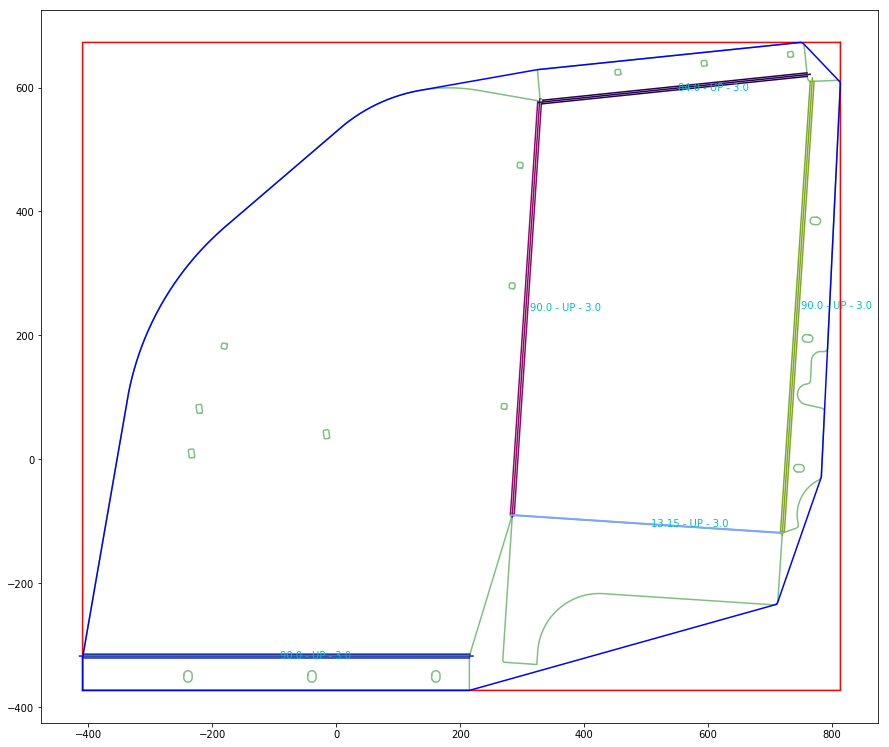

In [8]:
plot_dxf(details)

OK -  0  -  l1600620_flat1


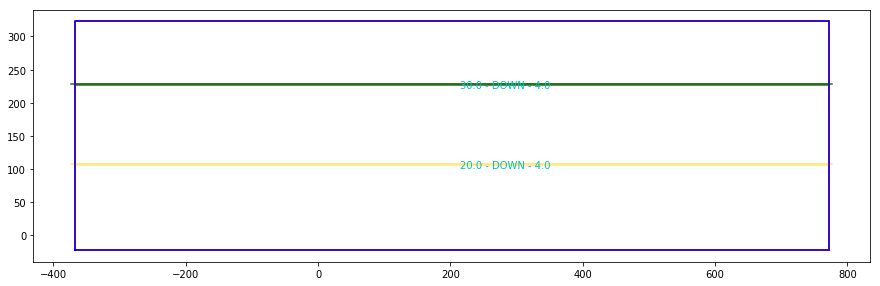

OK -  1  -  l1603760_flat1


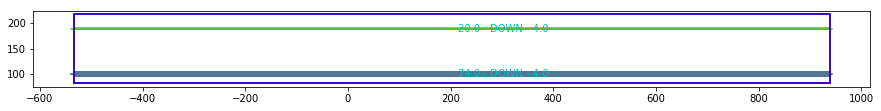

OK -  2  -  l1607120_flat1


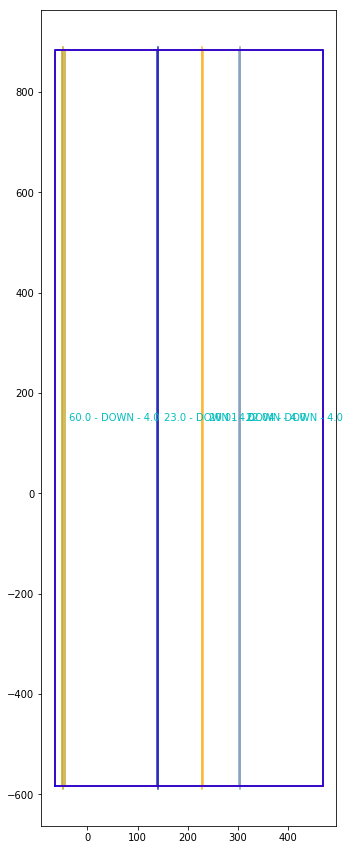

OK -  3  -  l1615440_flat1


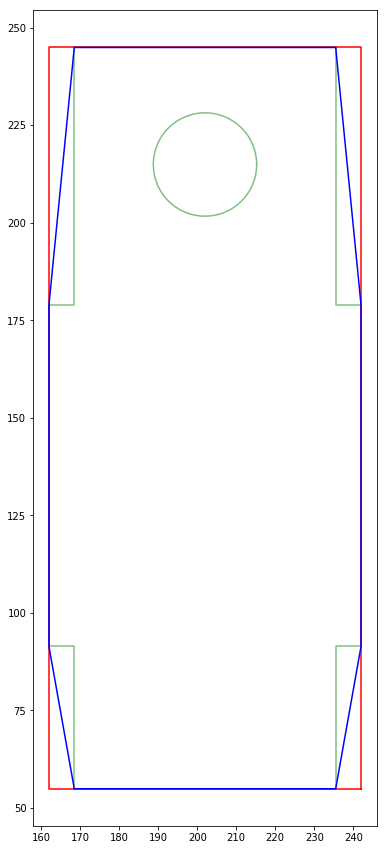

OK -  4  -  l1620100_flat1


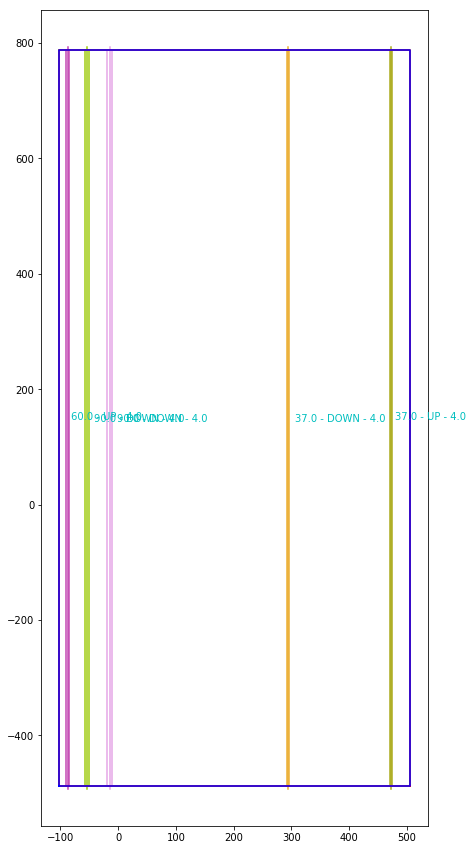

OK -  5  -  l2516640_flat1


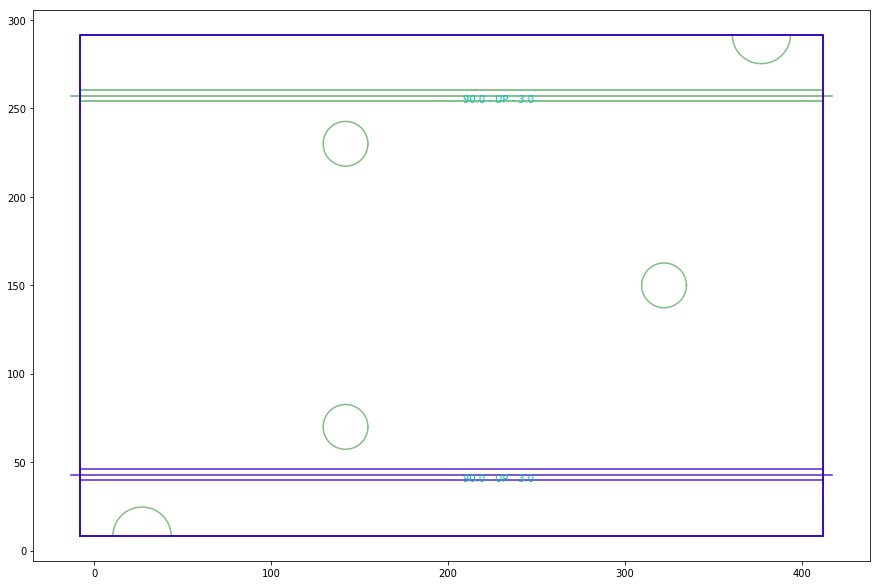

OK -  6  -  l3009412_flat1


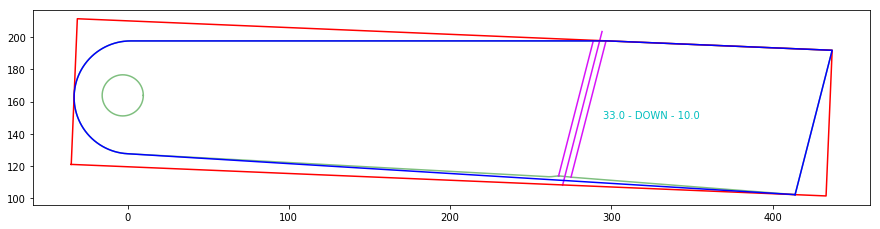

OK -  7  -  l3029670_flat1


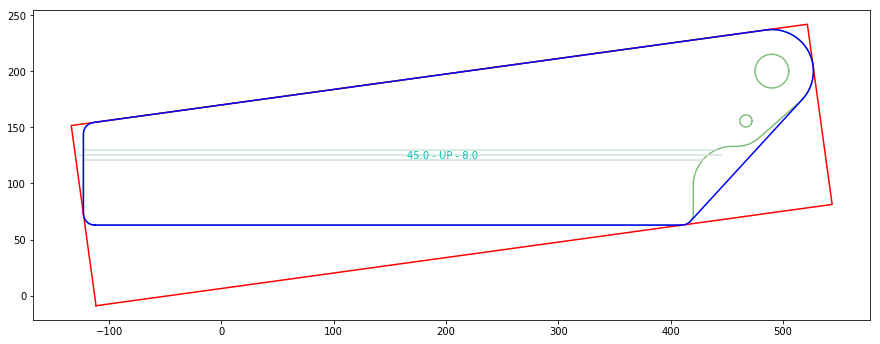

OK -  8  -  l3045070_flat1


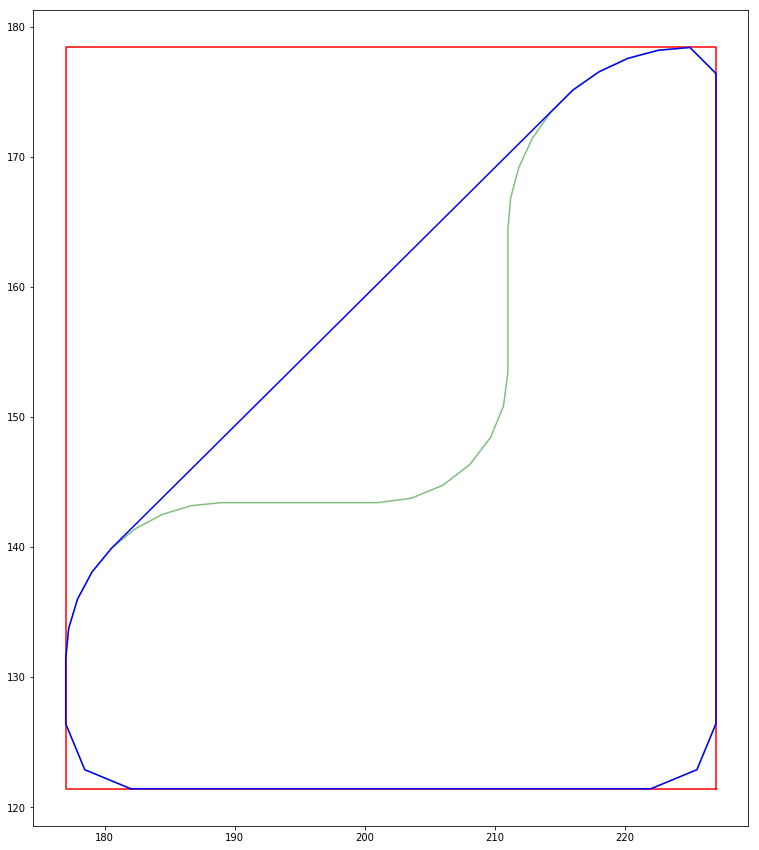

OK -  9  -  l3047580_flat1


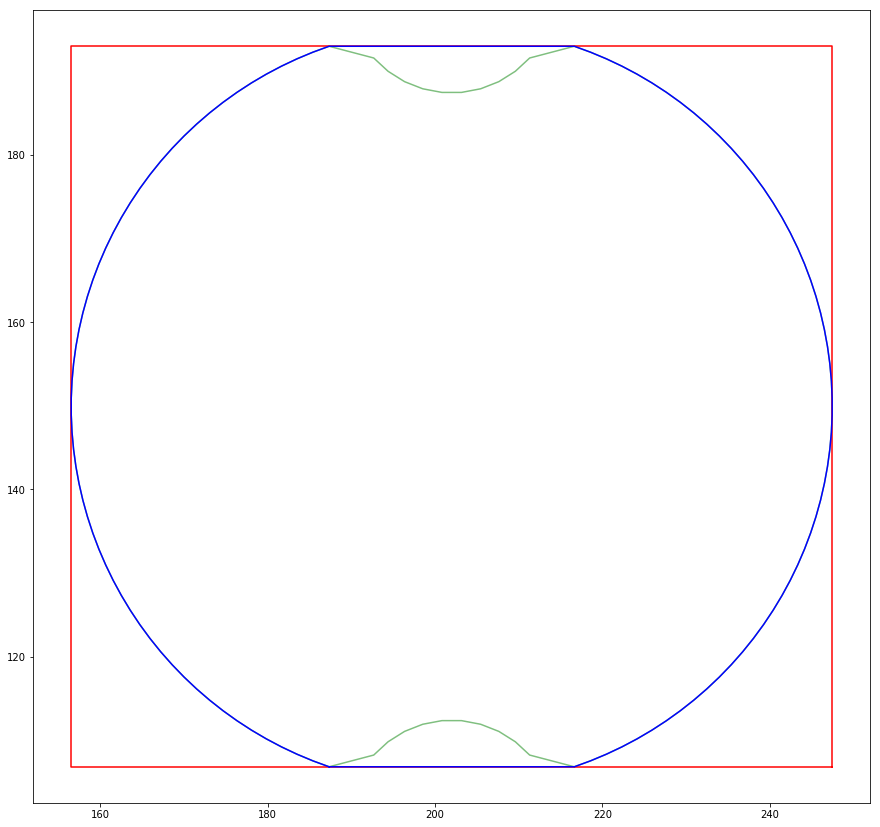

OK -  10  -  l3071970_flat1


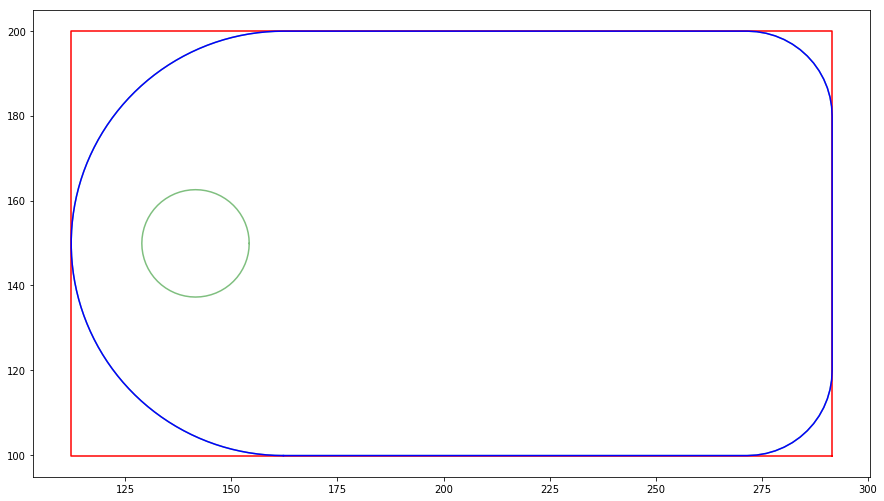

OK -  11  -  l3108260_flat1


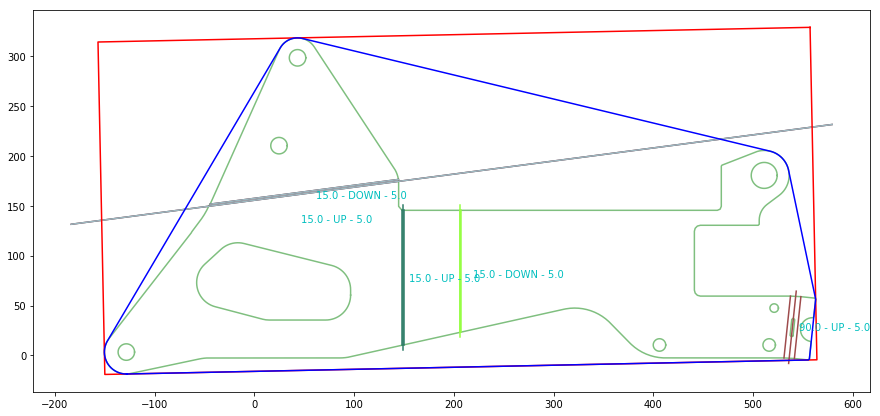

OK -  12  -  l3600210_flat1


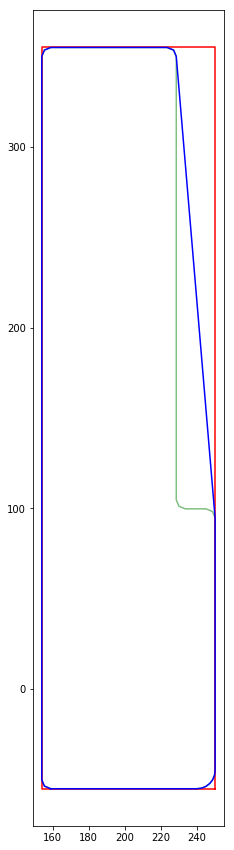

OK -  13  -  l3601370_flat1


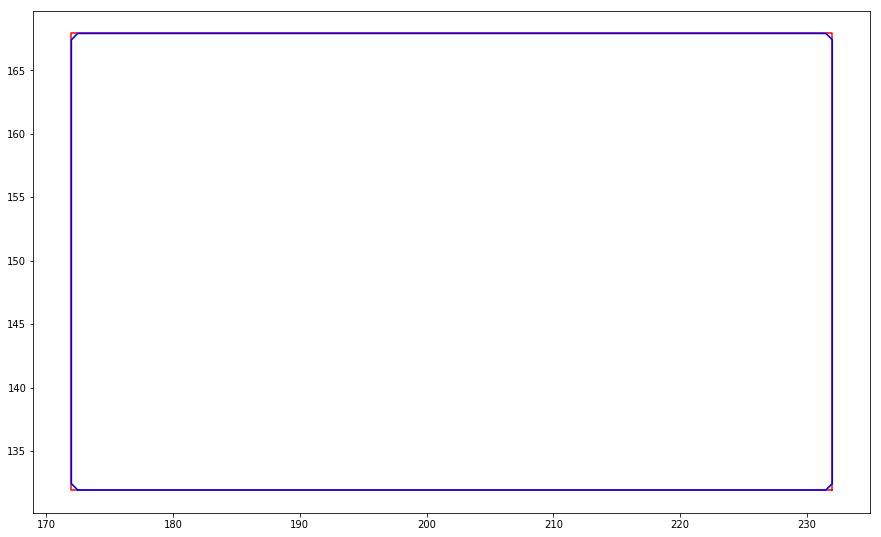

OK -  14  -  l3601381_flat1


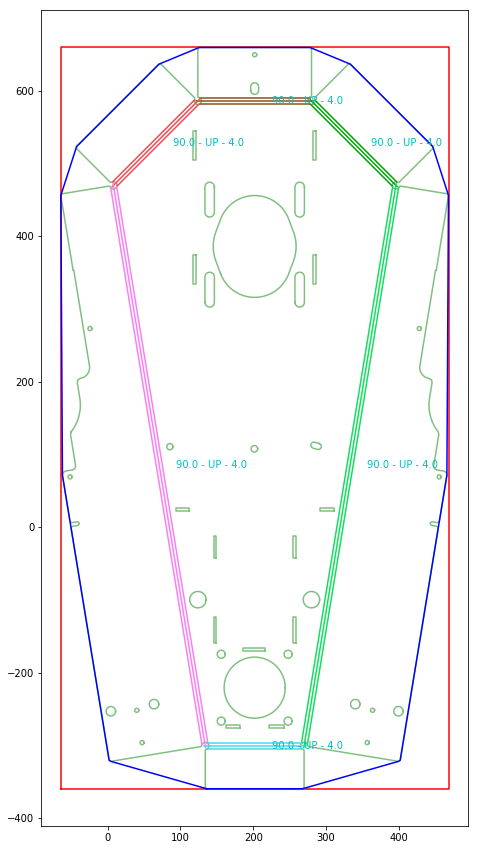

OK -  15  -  l3605790_flat1


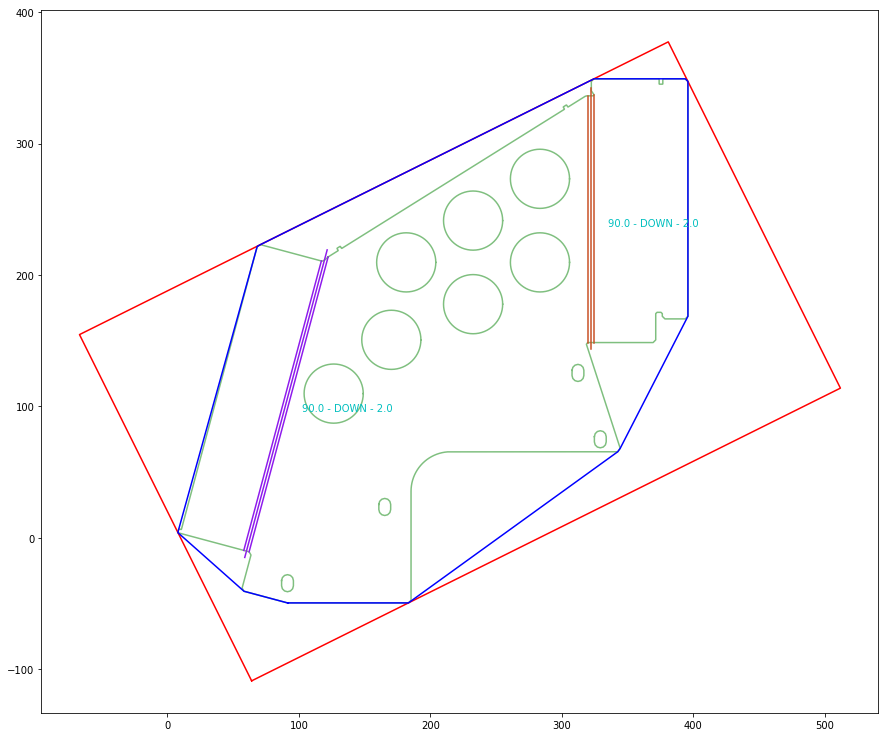

OK -  16  -  l3621160_flat1


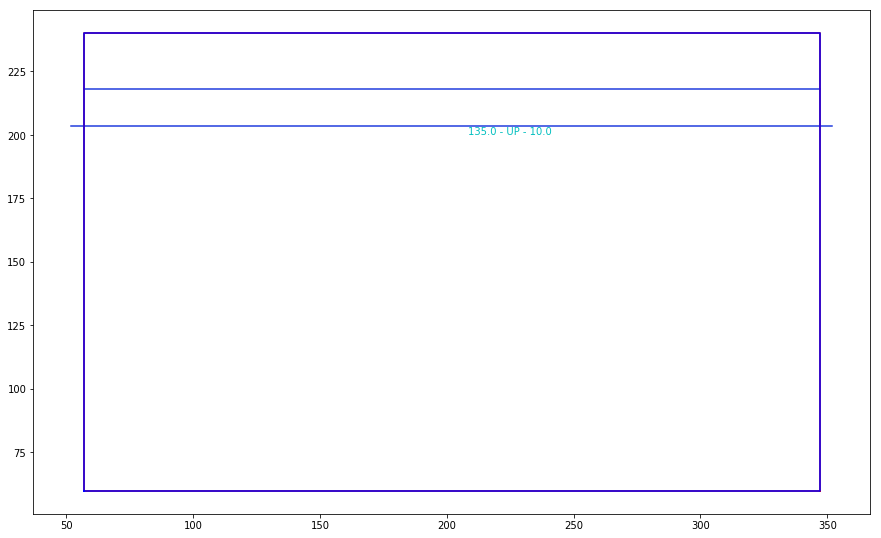

OK -  17  -  l3658400_flat1


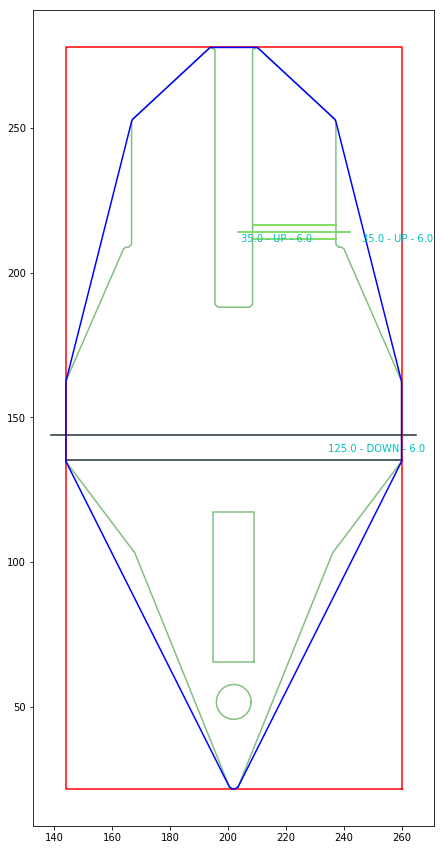

OK -  18  -  l5623690_flat1


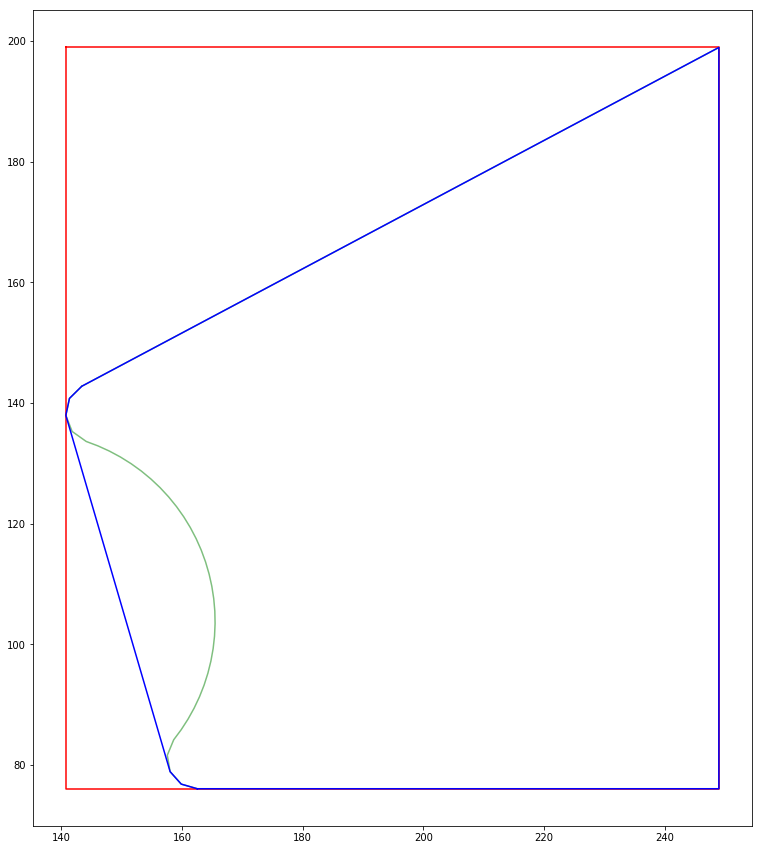

OK -  19  -  l5801080_flat1
round 2 !
OK -  20  -  l5801410_flat1
round 2 !


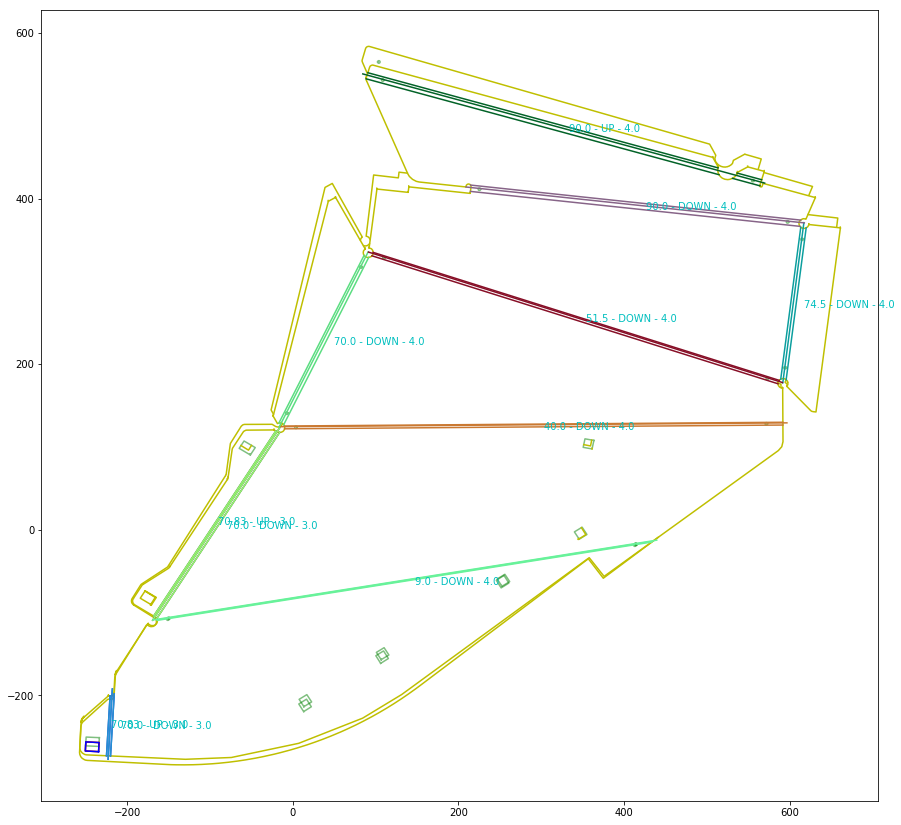

OK -  21  -  l6010400_flat1


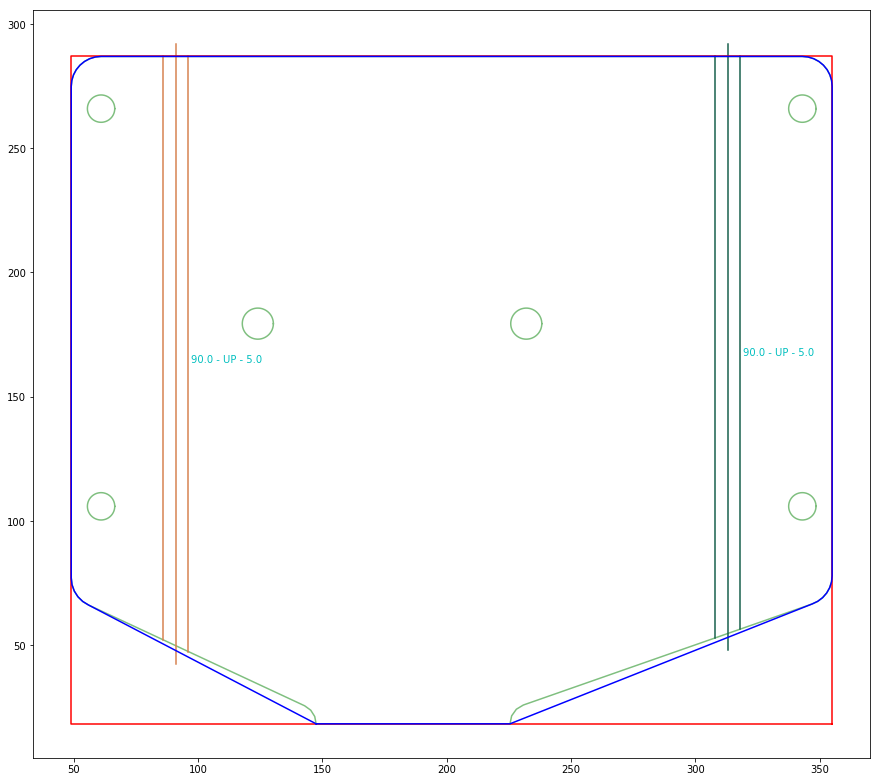

OK -  22  -  l6016360_flat1


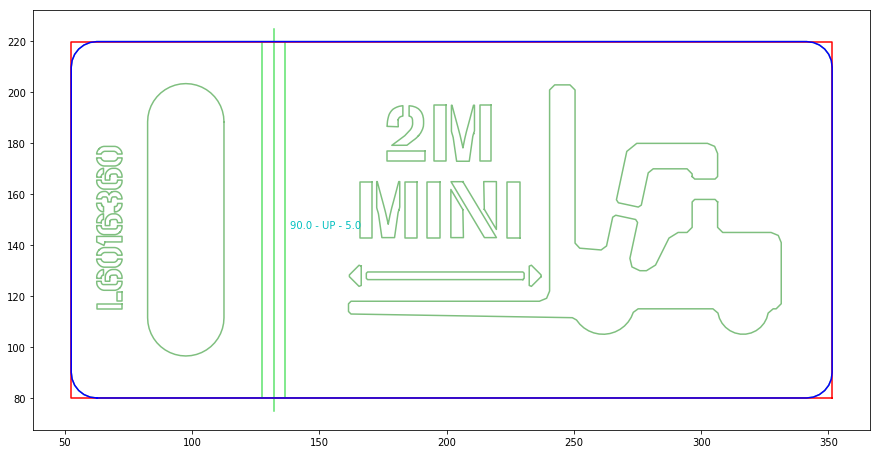

OK -  23  -  l6706120_flat1


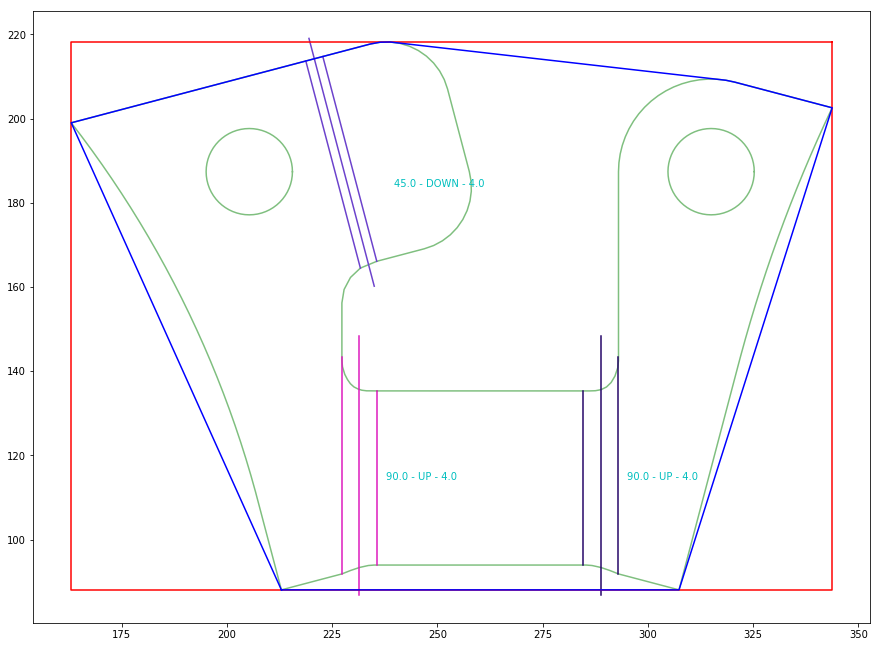

OK -  24  -  l6706130_flat1
OK -  25  -  l6706150_flat1


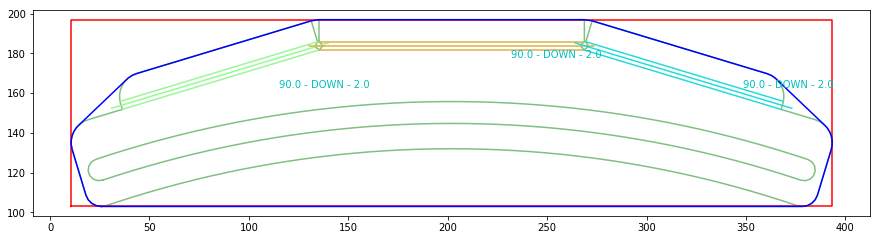

OK -  26  -  l6706160_flat1


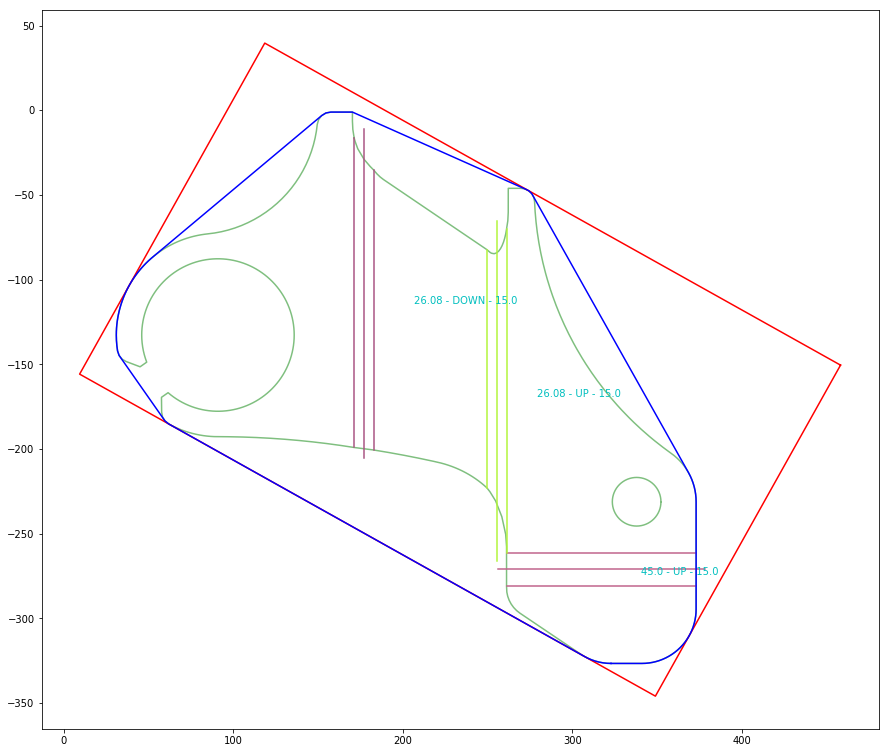

OK -  27  -  l6706170_flat1
round 2 !


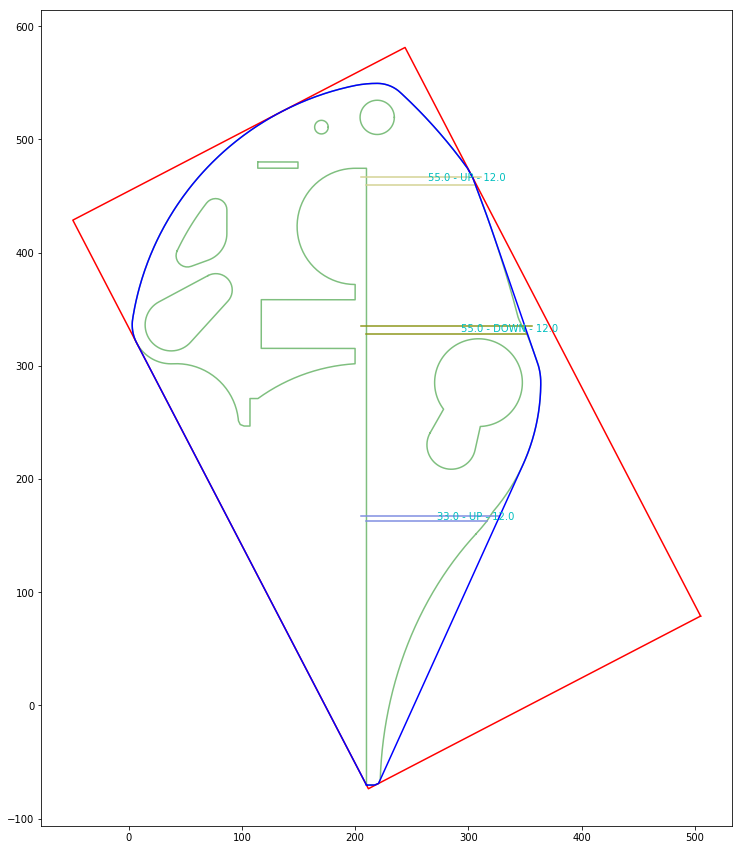

OK -  28  -  l7003610_flat1


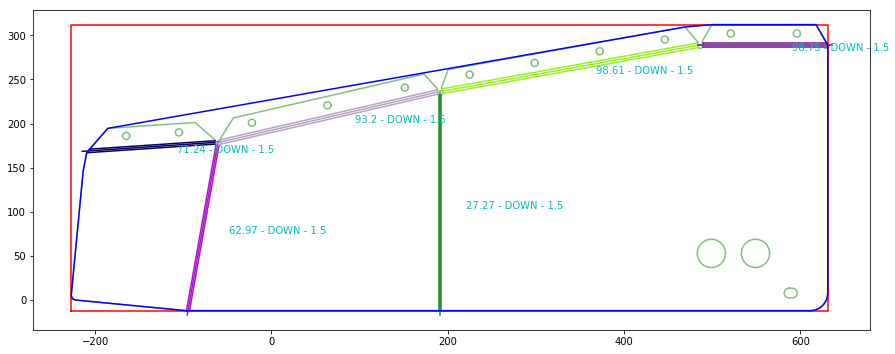

OK -  29  -  l7003890_flat1


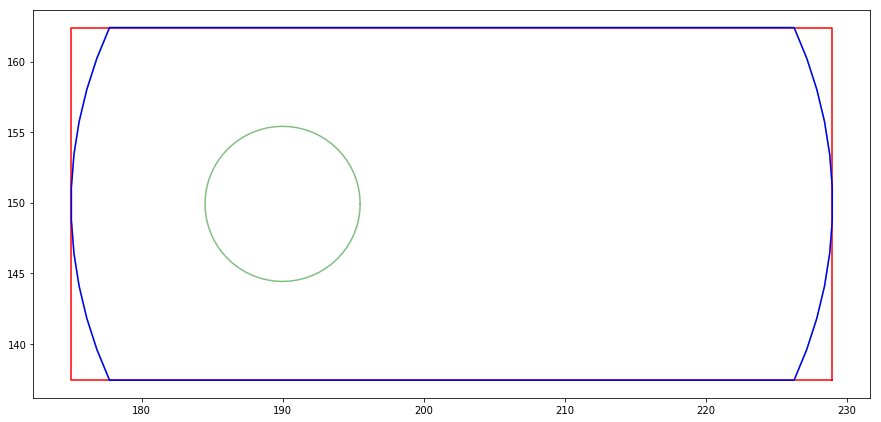

OK -  30  -  l7005381_flat1


/Users/cricket/Documents/ONline classes/A8 - veille thematique/sheet-metal-cost-calculator/Y1 - Notebooks/dxfreader.py:175: RuntimeWarning: Mean of empty slice.
  self.details['deformation_length'] = [np.array(np.array([LineString(coord).length for coord in tangentset]).mean()).sum() for tangentset in self.details['tangents_coords']]
/Users/cricket/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


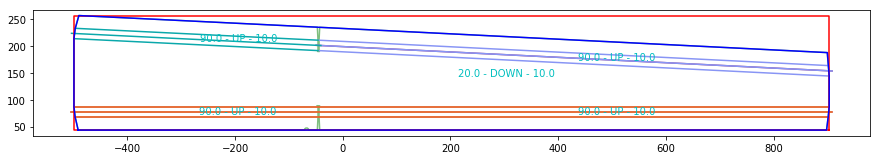

OK -  31  -  l7046970_flat1


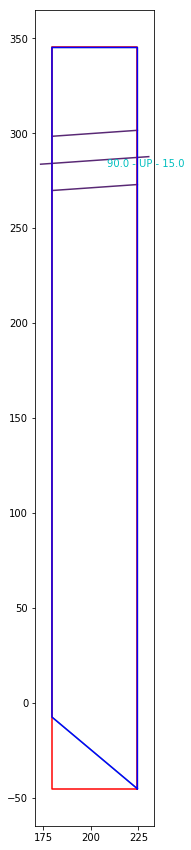

OK -  32  -  l7046980_flat1


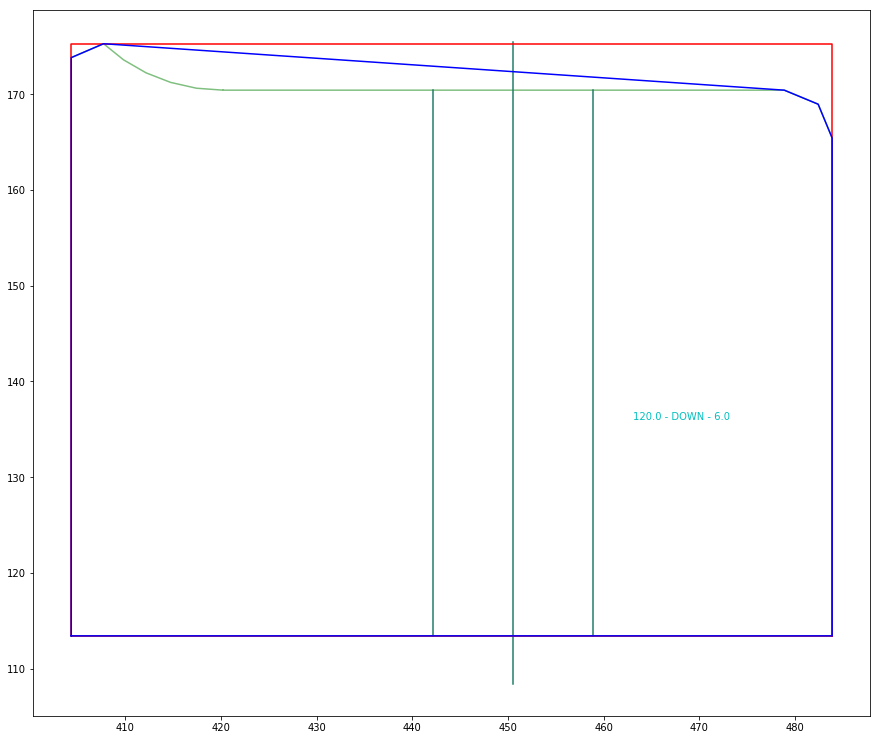

OK -  33  -  l7046990_flat1


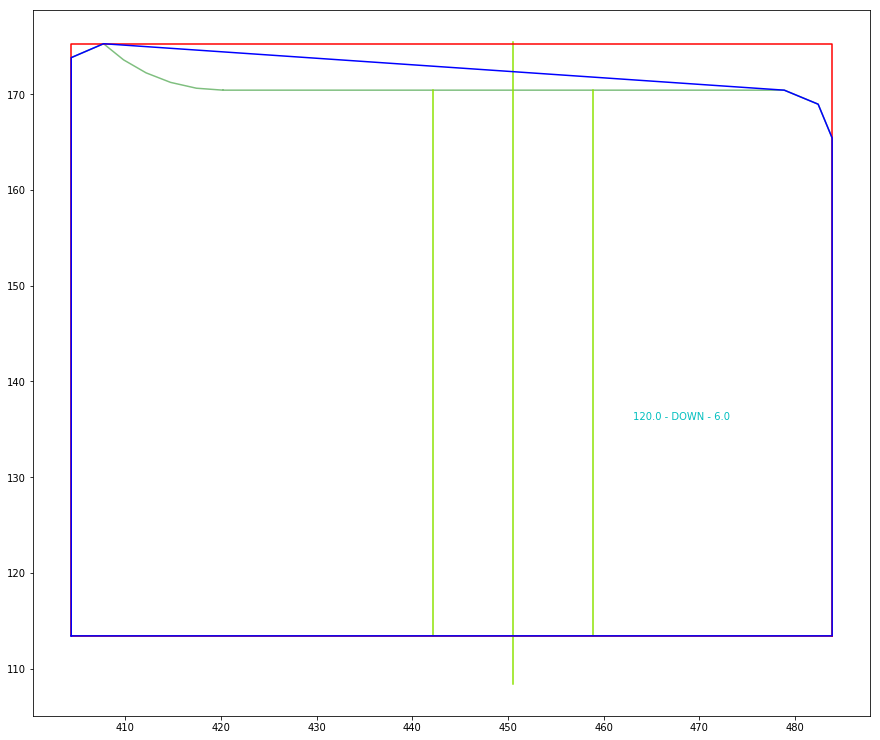

OK -  34  -  l7053370_flat1
round 2 !


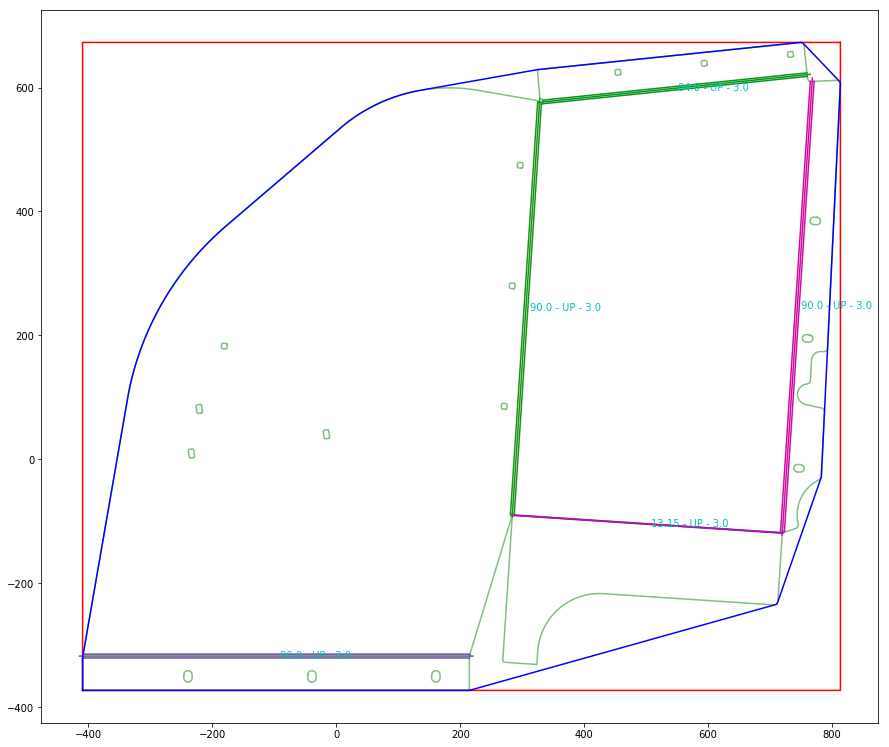

OK -  35  -  l7070730_flat1


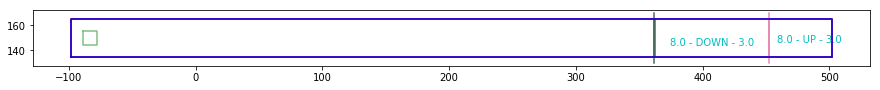

OK -  36  -  l7070760_flat1


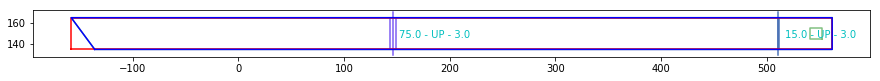

OK -  37  -  l7080410_flat1
OK -  38  -  l8023770_flat1
round 2 !
OK -  39  -  l8023780_flat1
round 2 !
OK -  40  -  l8047460_flat1


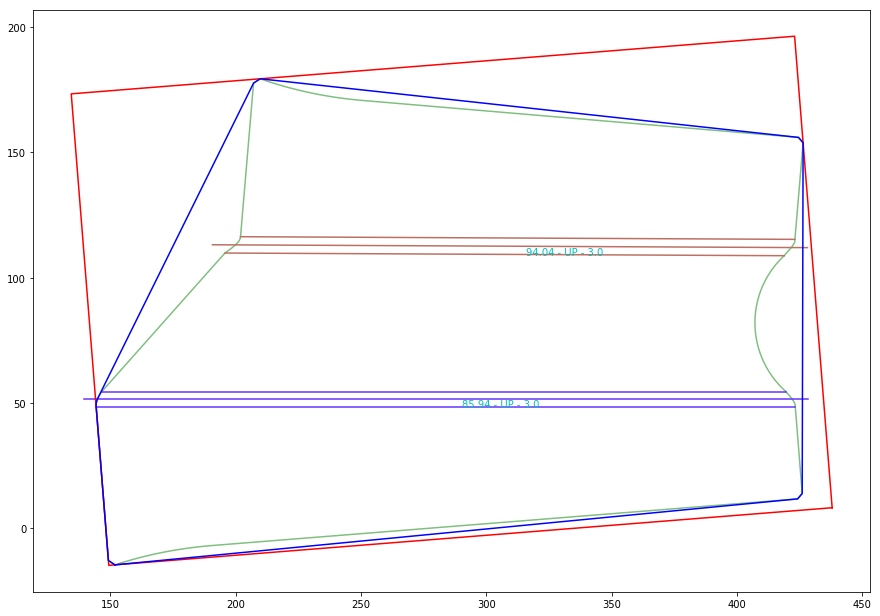

OK -  41  -  l8401470_flat1
round 2 !


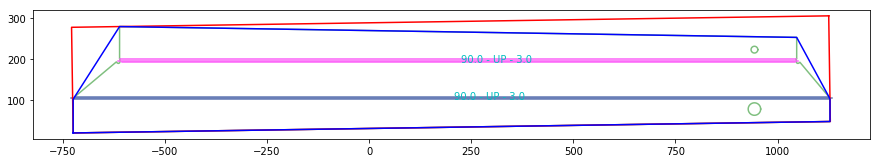

OK -  42  -  l8406000_flat1


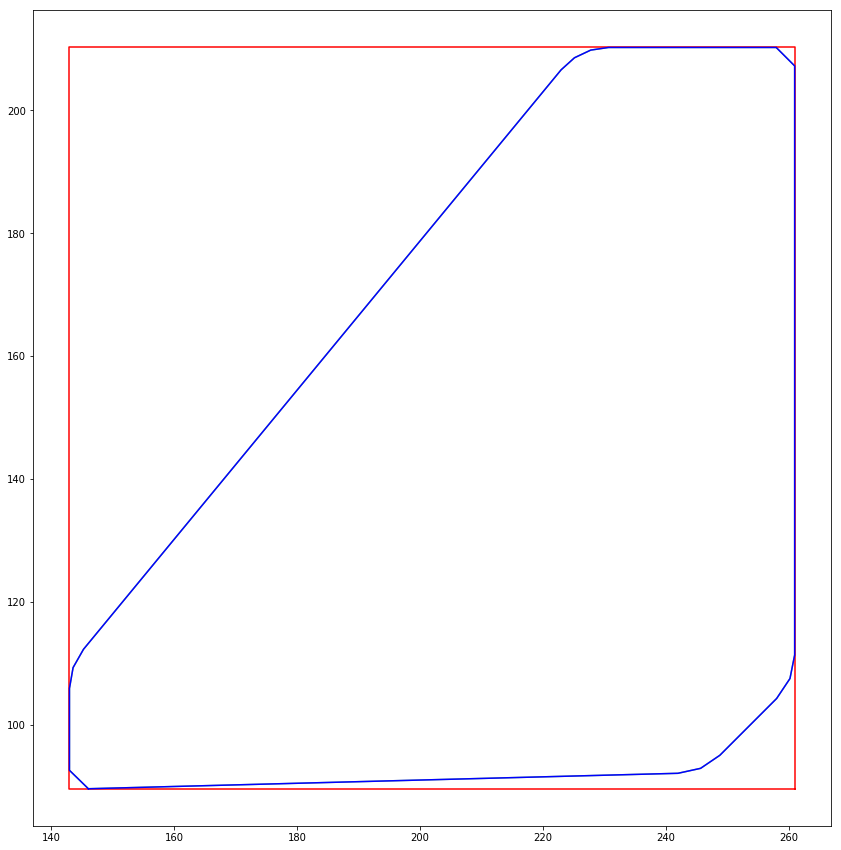

OK -  43  -  l8418910_flat1


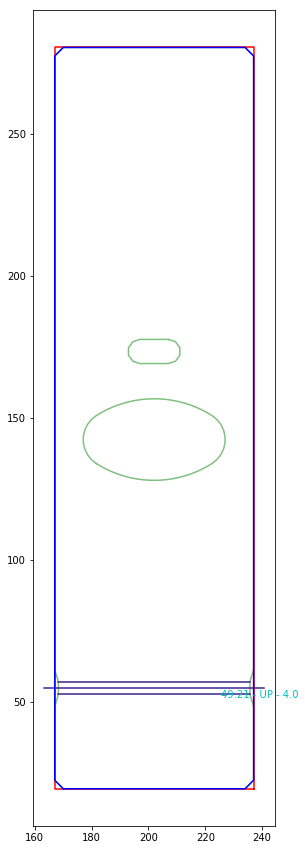

OK -  44  -  l8819790_flat1


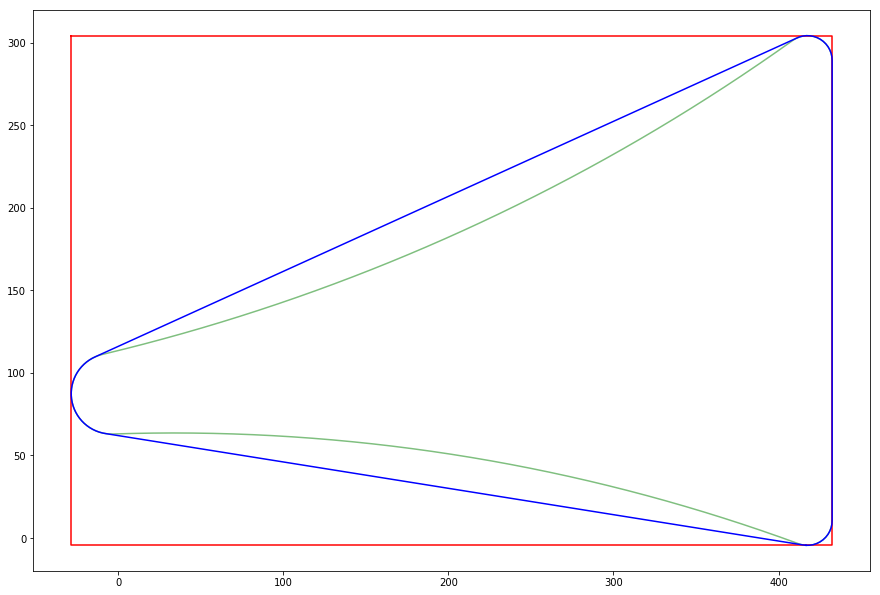

OK -  45  -  l8819800_flat1


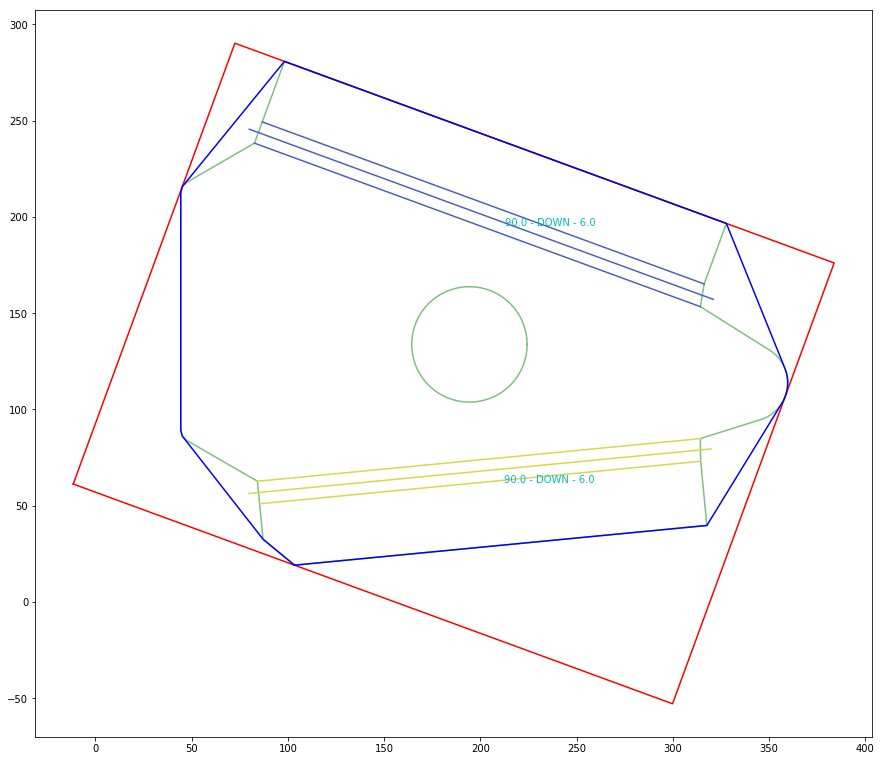

OK -  46  -  l8841850_flat1


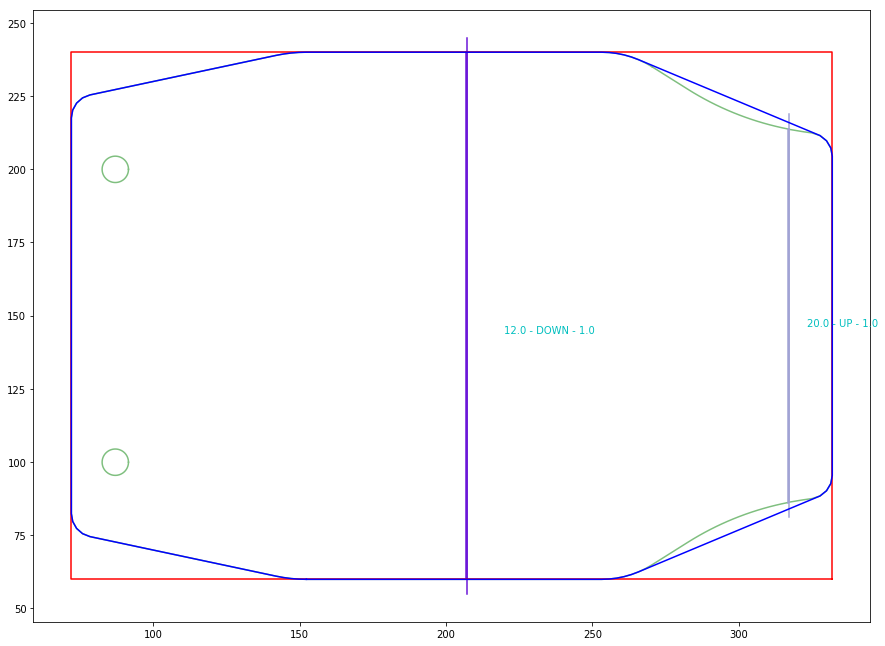

Total number of errors 5
[(19, 'l5801080_flat1'), (24, 'l6706130_flat1'), (37, 'l7080410_flat1'), (38, 'l8023770_flat1'), (39, 'l8023780_flat1')]


In [9]:
importlib.reload(dxfreader)

#List of all the dixs in the folder
dxffolder = '../Y2 - Sample DXF'
dxflist = [os.path.join(dxffolder, file) for file in os.listdir(dxffolder) if file.endswith('.dxf')]

columns = ['cut_length', 'num_closed_patterns', 'num_open_patterns', 'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1', 'minimum_rectangle_dim2',
           'convex_hull_area', 'no_hole_area', 'thickness', 'unit', 'material', 'radius', 'bend_radius',
           'bend_angle', 'bend_direction', 'deformation_length', 'possible_imperfection', 'bend_bend_distance',
           'bend_bend_angle', 'merged_bend', 'punch_length',
           'bend_edge_distance', 'bend_edge_angle', 'bend_edge_length']

errors=[]
dataset = pd.DataFrame(columns = columns)
dxfparser = dxfreader.DxfParser(min_edge_length=2,
                                roundigexp=3,
                                max_distance_correction=1.5)
for index, dxffile in enumerate(dxflist[:]):
    name = dxffile.split('/')[-1]
    name = name.split('.')[0]


    try:
        print('OK - ', index, ' - ', name)
        details = dxfparser.parse(dxffile)
        plot_dxf(details)
    except:
        #print('NOK - ', index, ' - ', name)
        details = {}
        errors.append((index, name))
    #dataset.loc[name] = [details.get(x, np.nan) for x in dataset.columns]
#dataset.to_csv('../B1 - Reports/Z1 - dataset.csv')
#dataset#.reset_index()
print('Total number of errors', len(errors))
print(errors)

In [10]:
mask = dataset['num_closed_patterns'].isna()
print('DXF errors remaining :', dataset[mask].shape[0])

DXF errors remaining : 0


In [11]:
dataset['thickness']

Series([], Name: thickness, dtype: object)

To add in the dataset:
- DONE + rectangle area
- DONE + rectangle dimension (height and width)
- DONE + Main area (no holes)
- DONE + convex hull area (no holes)
- DONE + Add the forgivness parameter
- bends:
    - DONE + Radius
    - DONE + Placement relative to outside edges (Min length, number, distance)
    - DONE + placement relative to other bends (Distance, Angle)
    - NOT NEEDED + Extend version of the bend lines
    - DONE + Punch length
    - DONE + Angle
    - DONE + Direction
    - DONE + Length of deformation
- DONE + Number of open loops
- DONE + Number of closed loops
- DONE + Cut Length
- DONE + Thickness
- DONE + Material grade